In [1]:
import tensorflow as tf
print(tf.__version__)
import math
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

2.2.0-rc4


In [2]:
uploaded = files.upload()

Saving sp500.csv to sp500.csv


In [0]:
  sp500 = pd.read_csv(io.BytesIO(uploaded['sp500.csv']))

In [0]:
sp500.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000
23192,2020-05-01,2869.090088,2869.090088,2821.610107,2830.709961,2830.709961,4753160000
23193,2020-05-04,2815.010010,2844.239990,2797.850098,2842.739990,2842.739990,4723140000


In [0]:
sp500['Adj Close'].isnull().sum()

0

In [0]:
sp500.shape

(23194, 7)

##creating returns an normal returns


In [0]:
df = sp500.copy()

In [0]:
df['return'] = sp500.Close.pct_change(1).mul(100)

In [0]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,return
23189,2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000,-0.524238
23190,2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000,2.658392
23191,2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,6523120000,-0.921245
23192,2020-05-01,2869.090088,2869.090088,2821.610107,2830.709961,2830.709961,4753160000,-2.805903
23193,2020-05-04,2815.010010,2844.239990,2797.850098,2842.739990,2842.739990,4723140000,0.424983


In [0]:
df.shape[0]

23194

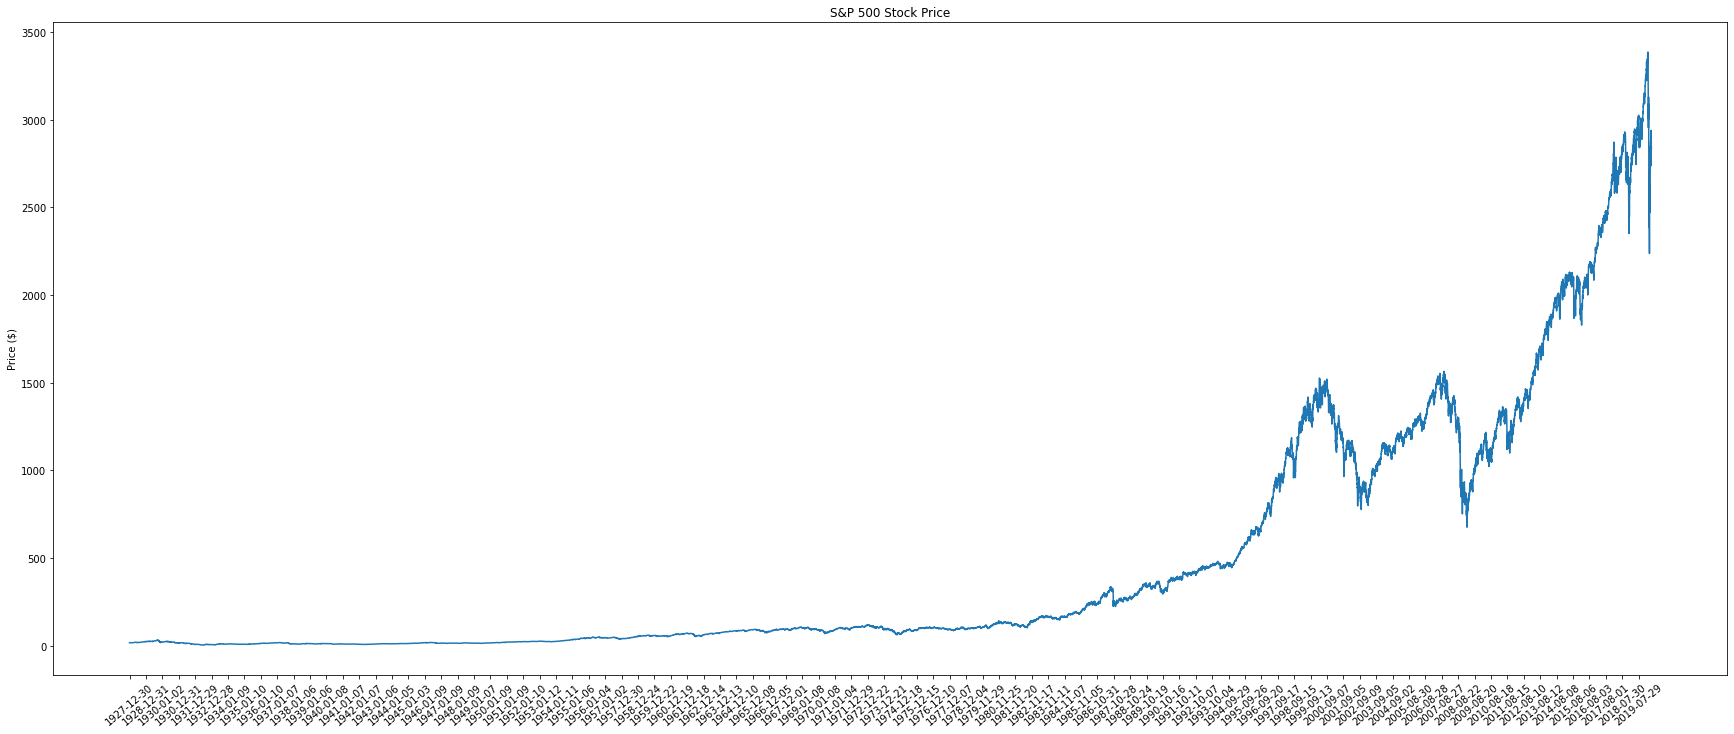

In [0]:
##plot the price
plt.figure(figsize = (30,12))
plt.plot(df.index, df['Close'])
plt.title('S&P 500 Stock Price')
#plt.xticks(range(),)
plt.xticks(range(0,df.shape[0],250),df['Date'].loc[::250],rotation=40)
plt.ylabel('Price ($)');
plt.show()


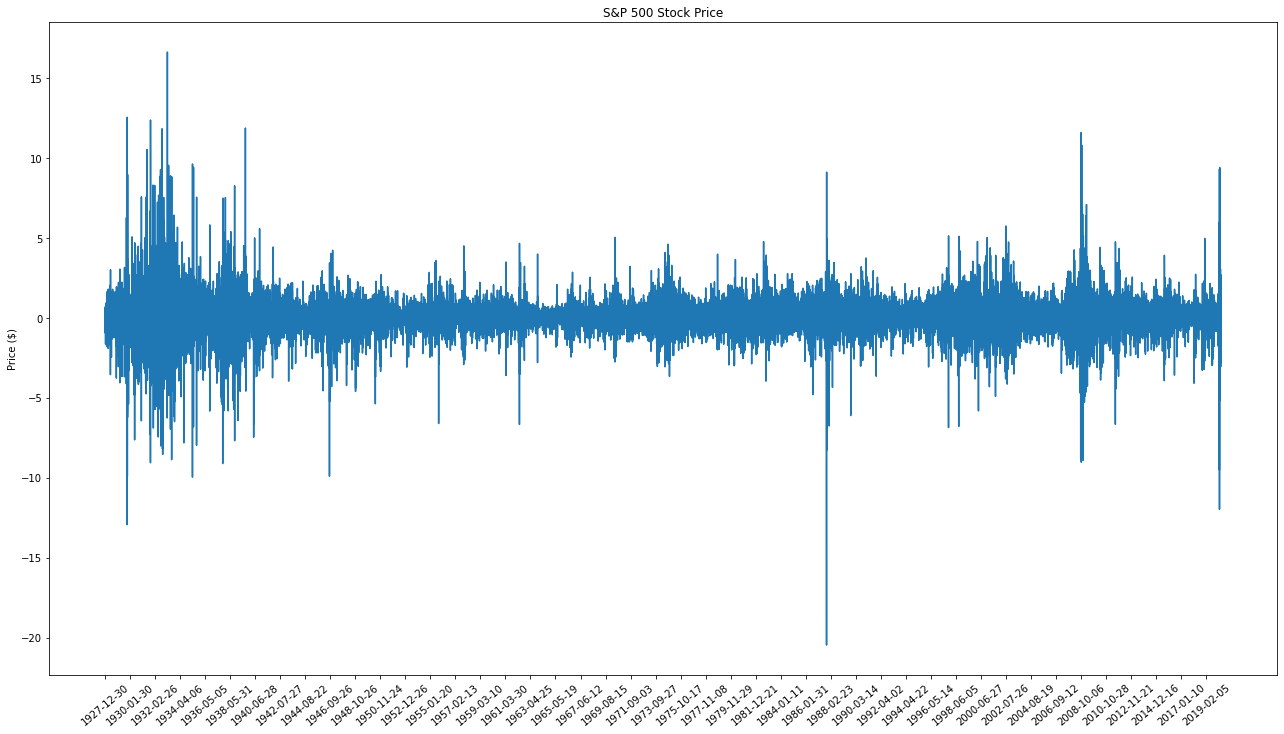

In [0]:
##plot the price
plt.figure(figsize = (22,12))
plt.plot(df.index, df['return'])
plt.title('S&P 500 Stock Price')
plt.xticks(range(0,df.shape[0],520),df['Date'].loc[::520],rotation=40)
plt.ylabel('Price ($)');
plt.show()


In [0]:
##using return
series_return = df['return']
print(series)
type(series)
time = np.arange(0,23194,1)
print(time)


[]
[    0     1     2 ... 23191 23192 23193]


In [0]:
##using close
series = df['Close']
print(series)
type(series)
time = np.arange(0,23194,1)
print(time)


0          17.660000
1          17.760000
2          17.719999
3          17.549999
4          17.660000
            ...     
23189    2863.389893
23190    2939.510010
23191    2912.429932
23192    2830.709961
23193    2842.739990
Name: Close, Length: 23194, dtype: float64
[    0     1     2 ... 23191 23192 23193]


In [0]:
series_return = pd.Series.to_numpy(series_return)

In [0]:
series = pd.Series.to_numpy(series)

In [0]:
series.shape

(23194,)

In [0]:
series_return.shape

(23194,)

In [0]:
series_return = series_return[18000:]

In [0]:
type(series_return)

numpy.ndarray

In [0]:
series_return.shape

(5194,)

In [0]:
time_return = np.arange(0,5194,1)

In [0]:
time = np.arange(0,5194,1)

In [0]:
series = series[18000:]

In [0]:
time_return.shape

(5194,)

In [0]:
series_return = series_return.astype(float)

In [0]:
series = series.astype(float)

In [0]:
#Split dataset into test and trainig sets
split_time = 18000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]
#craeting hyperparamter values 
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000


In [0]:
type(series_return)

pandas.core.series.Series

In [0]:
type(series_return)

numpy.ndarray

In [0]:
series_return.shape

(5194,)

In [0]:
###split for using retunrs 
split_time = 3600
time_train = time_return[:split_time]
x_train = series_return[:split_time]
time_valid = time_return[split_time:]
x_valid = series_return[split_time:]
#craeting hyperparamter values 
window_size = 64
batch_size = 128
shuffle_buffer_size = 1000

In [0]:
series = np.around(2)

In [0]:
series

2

In [0]:
#create winidowed dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    #split the data into feature and lables 
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [0]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [0]:
##input variable test 


In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 128
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
history = model.fit(train_set,epochs=100 ,callbacks=[lr_schedule])


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(5194,)
Epoch 1/100
41/41 [==============================] - 1s 28ms/step - loss: 1544.5404 - mse: 2741487.2500 - lr: 1.0000e-08
Epoch 2/100
41/41 [==============================] - 1s 28ms/step - loss: 1519.4331 - mse: 2669012.7500 - lr: 1.1220e-08
Epoch 3/100
41/41 [==============================] - 1s 27ms/step - loss: 1505.2817 - mse: 2626744.2500 - lr: 1.2589e-08
Epoch 4/100
41/41 [==============================] - 1s 29ms/step - loss: 1490.1458 - mse: 2580750.2500 - lr: 1.4125e-08
Epoch 5/100
41/41 [==============================] - 1s 30ms/step - loss: 1473.2532 - mse: 2530364.5000 - lr: 1.5849e-08
Epoch 6/100
41/41 [==============================] - 1s 29ms/step - loss: 1454.6198 - mse: 2475576.7500 - lr: 1.7783e-08
Epoch 7/100
41/41 [==============================] - 1s 28ms/step - loss: 1430.6740 - mse: 2404204.5000 - lr: 1.9953e-08
Epoch 8/100
41/41 [==============================] 

(1e-08, 0.0001, 0.0, 60.0)

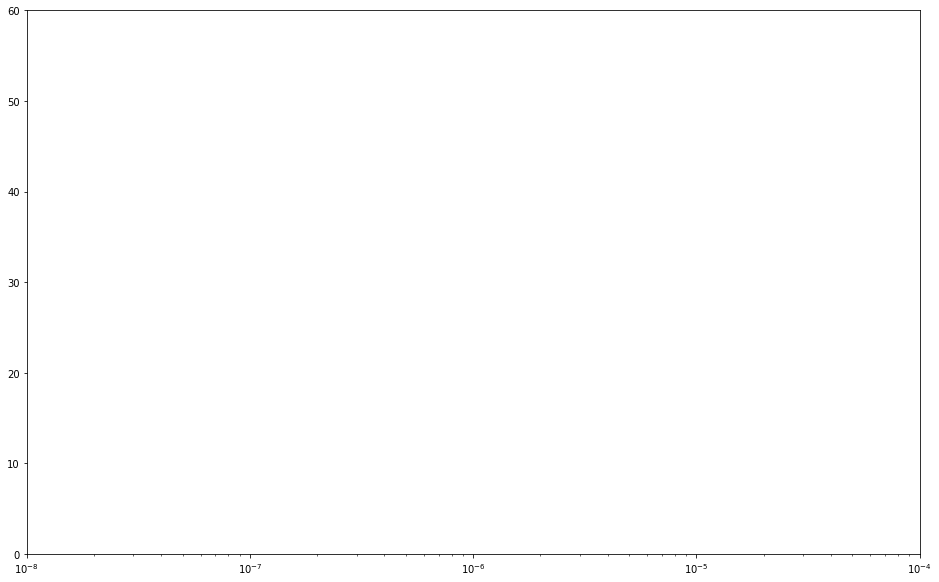

In [0]:
plt.figure(figsize=(16,10))
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=64, batch_size=128, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
41/41 [==============================] - 1s 28ms/step - loss: 627.7037 - mse: 564520.0625
Epoch 2/100
41/41 [==============================] - 1s 30ms/step - loss: 463.3153 - mse: 327788.7500
Epoch 3/100
41/41 [==============================] - 1s 27ms/step - loss: 506.9837 - mse: 394225.0000
Epoch 4/100
41/41 [==============================] - 1s 29ms/step - loss: 552.4695 - mse: 457696.6562
Epoch 5/100
41/41 [==============================] - 1s 29ms/step - loss: 775.6146 - mse: 926040.7500
Epoch 6/100
41/41 [==============================] - 1s 30ms/step - loss: 527.3315 - mse: 495977.5312
Epoch 7/100
41/41 [==============================] - 1s 30ms/step - loss: 541.4489 - mse: 518510.8750
Epoch 8/100
41/41 [==============================] - 1s 29ms/step - loss: 510.9224 - mse: 487063.5938
Epoch 9/100
41/41 [==============================] - 1s 29ms/step - loss: 498.1447 - mse: 458739.9688
Epoch 10/100
41/41 [==============================] - 1s 30ms/step - loss: 439.766

KeyboardInterrupt: ignored

In [0]:
rnn_forecast = model_forecast(model, series_return[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [0]:
tf.keras.metrics.mse(x_valid, rnn_forecast).numpy()

1.3763674

In [0]:
RMSE = math.sqrt(tf.keras.metrics.mse(x_valid, rnn_forecast).numpy())
print('RMSE is equal to %.5f' %RMSE)

RMSE is equal to 1.17319


In [0]:

x_valid.shape

(1594,)

Text(0.5, 1.0, 'S&P500 stock returns prediction vs Actual')

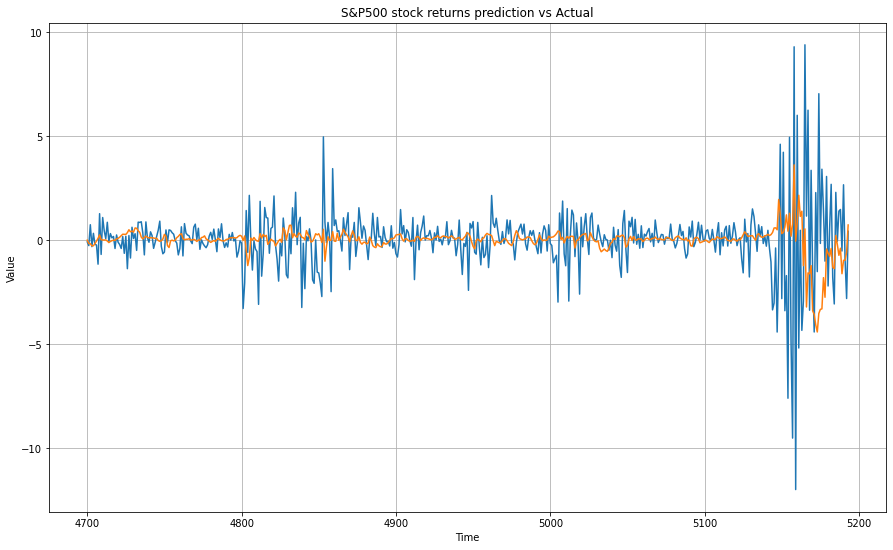

In [0]:
plt.figure(figsize=(15,9))
plot_series(time_valid[1100:1594], x_valid[1100:1594])
plot_series(time_valid[1100:1594], rnn_forecast[1100:1594])
plt.title("S&P500 stock returns prediction vs Actual")

Text(0.5, 1.0, 'HP stock predciton vs Actual')

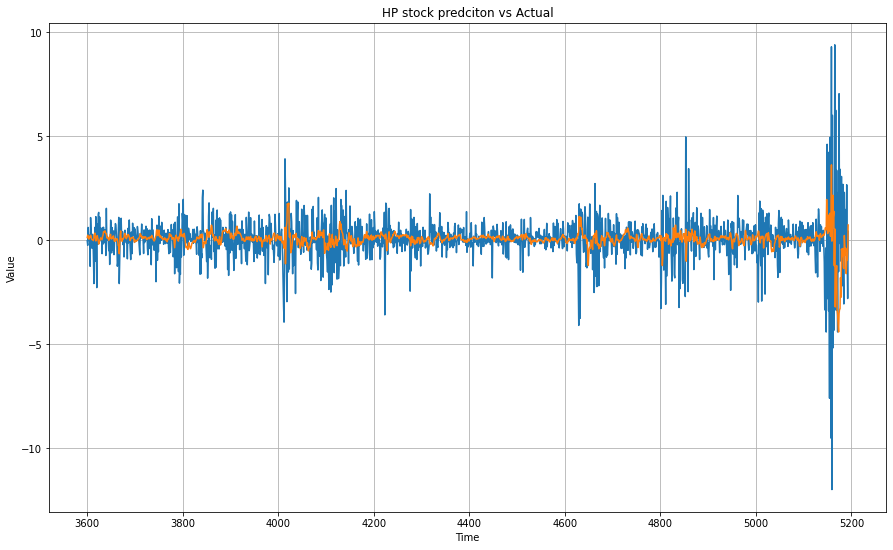

In [0]:
plt.figure(figsize=(15,9))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)
plt.title("HP stock predciton vs Actual")

In [0]:
history.history['val_acc']

KeyError: ignored

<Figure size 864x648 with 0 Axes>

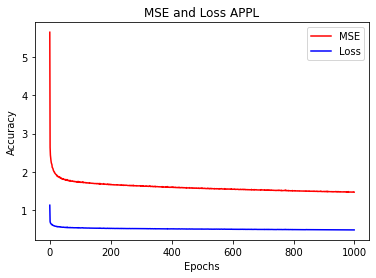

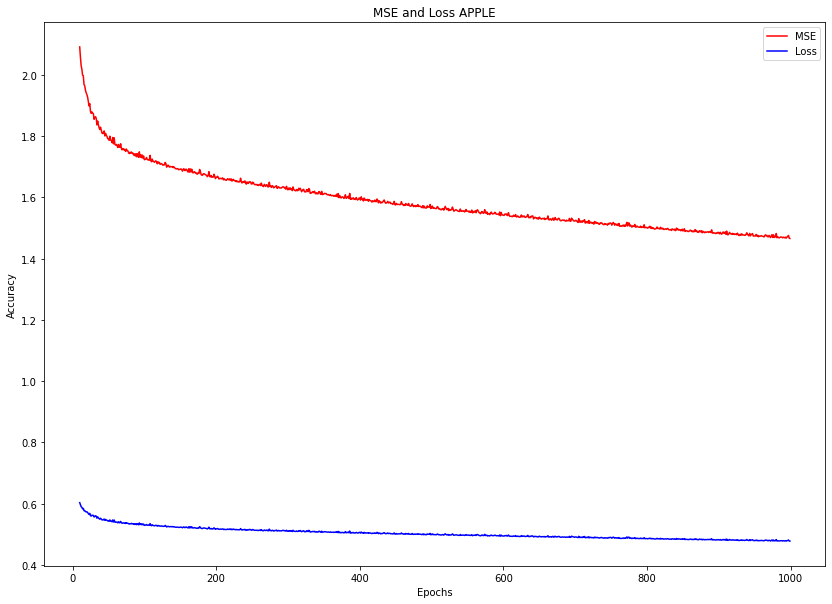

<Figure size 864x648 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mse=history.history['mse']
loss=history.history['loss']
epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mse, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MSE and Loss APPL')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MSE", "Loss"])

epochs_zoom = epochs[10:]
mse_zoom = mse[10:]
loss_zoom = loss[10:]
plt.figure(figsize=(14,10))

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mse_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MSE and Loss APPLE')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MSE", "Loss"])
plt.figure(figsize=(12,9))


In [0]:
len(loss)

1000

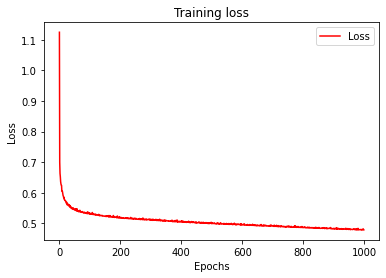

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()
zoomed_loss = loss[400:]
zoomed_epochs = range(400,1000)

In [0]:
len(zoomed_loss)

600

In [0]:
len(zoomed_epochs)

200

<Figure size 432x288 with 0 Axes>

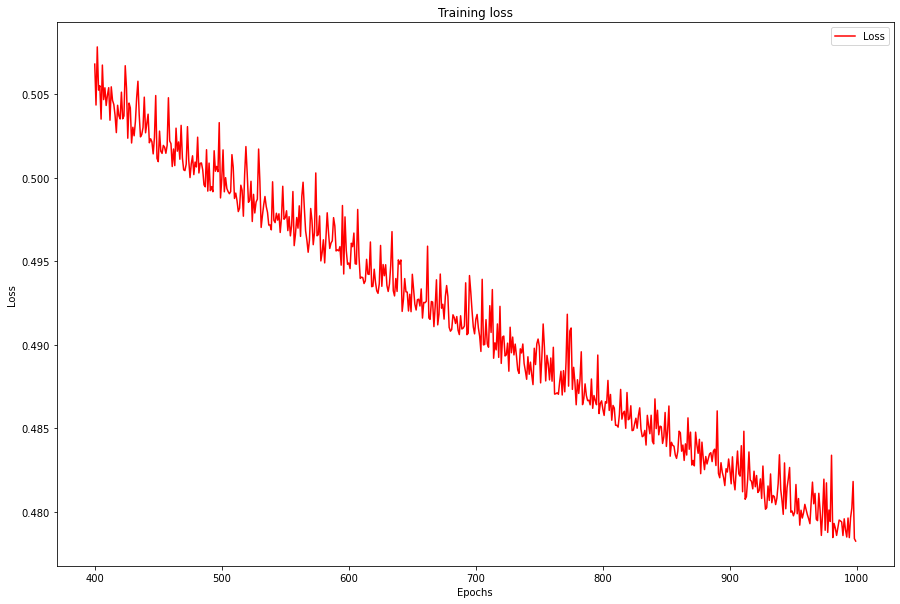

<Figure size 432x288 with 0 Axes>

In [0]:
plt.figure(figsize=(15,10))
plt.plot(zoomed_epochs, zoomed_loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()